In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['legend.frameon'] = True
# palette = sns.color_palette('Set1')
# sns.set_palette(palette)

In [2]:
SEED = 10

# Data

In [3]:
import os
os.listdir('data')

['calendar.csv',
 'price_series.csv',
 'sales_train_evaluation.csv',
 'sales_train_validation.csv',
 'sample_submission.csv',
 'sell_prices.csv',
 'train_data.csv']

In [4]:
df_train = pd.read_csv('data/sales_train_evaluation.csv')
df_valid = pd.read_csv('data/sales_train_validation.csv')
df_price = pd.read_csv('data/sell_prices.csv')
df_calendar = pd.read_csv('data/calendar.csv')

In [5]:
df_calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [6]:
df_train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [7]:
df_valid

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [8]:
df_price

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


* Индентификаторы данных: `store_id` и `item_id`. Общий `id` складывается из этих двух значений;
* Для обучающей выборки -- 1941 наблюдение (по столбцам), для валидационной -- 1913 (на самом деле должно быть наоброт, ибо разницу в 28 дней мы прогнозируем);
* Метки столбцов -- дни, значения -- число проданных единиц в тот или иной день (count data);
* Сведения о днях приведены в таблице `calendar.csv`, содержат информацию о самой дате (день недели, месяц, год) и дополнительную информацию (праздники и т.д.)

Случайным образом выберем магазин и категорию товаров.

In [9]:
sample_row = df_train.sample(random_state=SEED)
store_id = sample_row.store_id.values[0]
cat_id = sample_row.cat_id.values[0]
store_id, cat_id

('WI_2', 'HOUSEHOLD')

В качестве обучающих и валидационных таблиц оставим срезы только для этого магазина и этой категории.

In [10]:
df_train = df_train[(df_train.store_id == store_id) & (df_train.cat_id == cat_id)].copy()
df_valid = df_valid[(df_valid.store_id == store_id) & (df_valid.cat_id == cat_id)].copy()
assert len(df_train.state_id.unique()) == 1
assert len(df_valid.state_id.unique()) == 1

Выкинем лишние столбцы за ненадобностью.

In [11]:
df_train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
24957,HOUSEHOLD_1_001_WI_2_evaluation,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,0,0,1,0,...,2,0,0,1,0,2,3,0,1,1
24958,HOUSEHOLD_1_002_WI_2_evaluation,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,0,0,1,1,...,0,2,0,0,1,0,1,0,1,1
24959,HOUSEHOLD_1_003_WI_2_evaluation,HOUSEHOLD_1_003,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,0,0,0,0,...,2,0,0,0,0,1,1,2,0,0
24960,HOUSEHOLD_1_004_WI_2_evaluation,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,1,4,4,4,...,9,0,0,3,0,0,0,0,0,0
24961,HOUSEHOLD_1_005_WI_2_evaluation,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,0,0,0,0,...,2,2,2,2,2,0,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25999,HOUSEHOLD_2_512_WI_2_evaluation,HOUSEHOLD_2_512,HOUSEHOLD_2,HOUSEHOLD,WI_2,WI,0,1,0,0,...,1,0,1,0,0,1,0,0,0,2
26000,HOUSEHOLD_2_513_WI_2_evaluation,HOUSEHOLD_2_513,HOUSEHOLD_2,HOUSEHOLD,WI_2,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26001,HOUSEHOLD_2_514_WI_2_evaluation,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,WI_2,WI,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
26002,HOUSEHOLD_2_515_WI_2_evaluation,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,WI_2,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_train.drop(columns=['store_id', 'cat_id', 'state_id'], inplace=True)
df_valid.drop(columns=['store_id', 'cat_id', 'state_id'], inplace=True)

Получили основные таблицы с данными о товарах. Получим из них теперь ряды: удалим все остальные `id` и суммируем данные построчно, чтобы данные в столбцах отображали суммарные продажи. Такой ряд анализировать гораздо проще.

In [13]:
to_drop = df_train.columns[:3]
train_series = df_train.drop(columns=to_drop).sum()
valid_series = df_valid.drop(columns=to_drop).sum()

Переведем индексацию из строчной в числовую (уберем d_).

In [14]:
train_series.index = train_series.index.str[2:].astype(int)
valid_series.index = valid_series.index.str[2:].astype(int)

In [15]:
train_series.shape, valid_series.shape

((1941,), (1913,))

Возможно, придется как-то учитывать событийный признак -- это категория. Посмотрим, какие типы событий вообще могут быть.

In [16]:
EVENTS = set(df_calendar.event_type_1.dropna().unique()) | set(df_calendar.event_type_2.dropna().unique())
EVENTS

{'Cultural', 'National', 'Religious', 'Sporting'}

In [17]:
EVENT_COLORS = {
    'Cultural': 'lime',
    'National': 'crimson',
    'Religious': 'blueviolet',
    'Sporting': 'dodgerblue',
}

Был выбран тип товаров `HOUSEHOLD`, а значит, SNAP-столбцы нас не интересуют, так как они относятся к питанию (*Supplemental Nutrition Assistance Program*). В выбранной категории это вряд ли поможет.

In [18]:
df_calendar.isna().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

Выбросим рядовые дни.

In [19]:
HOLIDAYS = df_calendar.loc[df_calendar[['event_type_1', 'event_type_2']].isna().sum(axis=1) != 2].copy()

Наконец, отрисуем обучающий ряд. Также вывожу метки событийных дней.

In [20]:
def mean_by_period(series, period_N=30):
    N = len(series)
    splits = np.array_split(series.index.to_numpy(), N // period_N)
    
    days, values = [], []
    for spl in splits:
        days.append(spl[-1])
        values.append(series[spl].mean())
    return days, values
    
    
def draw_series(series: pd.Series, figsize=(11, 5), events=EVENTS, title=None, 
                            ylim=None, period_N=30, show_events=False, lineplot_cats=False):
    N = len(series)
    last_day = series.index[-1]
    first_day = series.index[0]
    
    plt.figure(figsize=figsize)
    
    alpha_series = 0.9
    if show_events:
        alpha_series -= 0.1
    if lineplot_cats:
        alpha_series -= 0.2
    plt.plot(series, color='royalblue', linewidth=0.7, alpha=alpha_series)
    
    if not lineplot_cats:
        plt.plot(*mean_by_period(series, period_N), linewidth=2, color='cyan',
                 linestyle='--', label=f'{period_N}d avg dynamics')
    
    if show_events:
        for cat in events:
            holidays = HOLIDAYS[(HOLIDAYS.event_type_1 == cat) | (HOLIDAYS.event_type_2 == cat)].d
            holidays = holidays.str[2:].astype(int)
            holidays = holidays[(holidays <= last_day) & (holidays >= first_day)]
            plt.scatter(holidays, series[holidays], s=15, zorder=2, alpha=1, color=EVENT_COLORS[cat], label=cat)
            if lineplot_cats:
                plt.plot(holidays, series[holidays], zorder=2, linewidth=0.8, alpha=1, color=EVENT_COLORS[cat])
    
    if ylim is not None:
        plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Num sold')
    if title is not None:
        plt.title(title)
    plt.show()

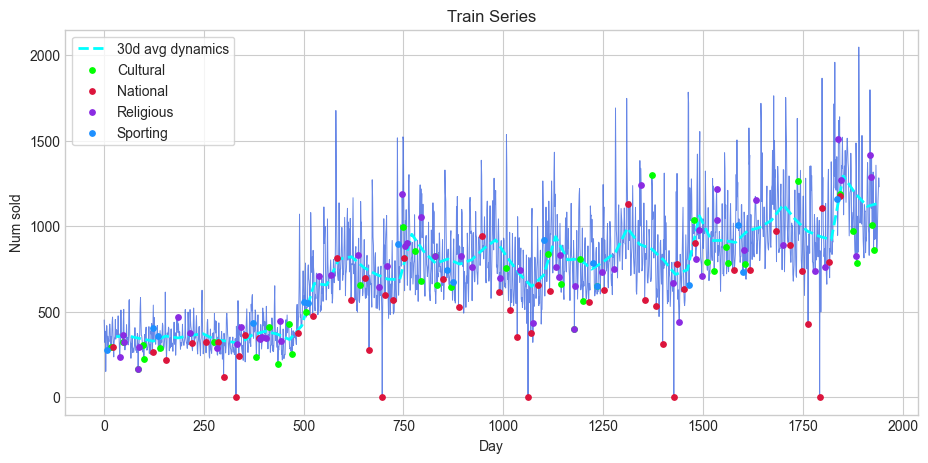

In [21]:
draw_series(train_series, show_events=True, title='Train Series')

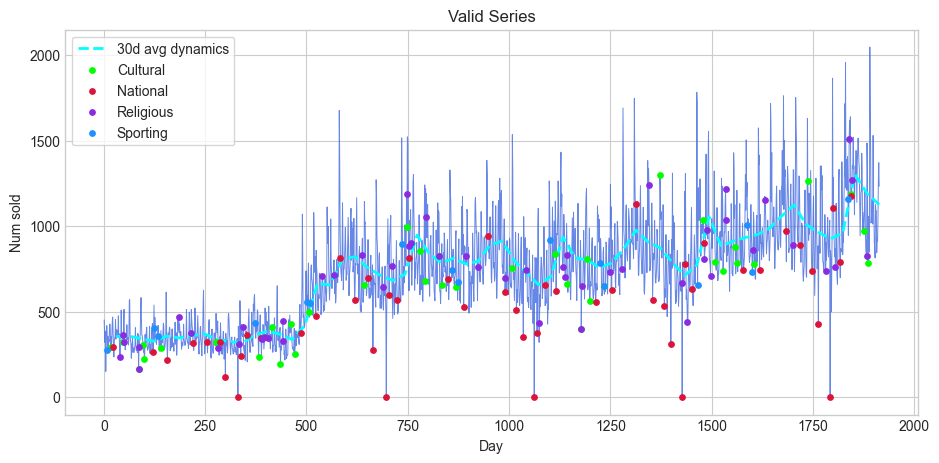

In [22]:
draw_series(valid_series, show_events=True, title='Valid Series')

Похоже, что валидационные и обучающие данные в аггрегации -- это одно и то же.

In [23]:
np.allclose(valid_series[:1500], train_series[:1500])

True

Да, так и есть. Будем работать просто с обучающими данными.

# Некоторый анализ

Что можно сказать об этом ряде?

## Праздники

Число продаж минимальное в национальные праздники, часто вообще нулевое: вероятно, магазин просто не работает в эти дни (день независимости США (**???**)). Проверим это.

In [24]:
_ = train_series[train_series == 0].index.to_numpy()
print('Zero sales days:', *_)
print('periods:', _[1:] - _[:-1])

Zero sales days: 331 697 1062 1427 1792
periods: [366 365 365 365]


Действительно, между этими точками интервал -- год. Узнаем, что это за праздник.

In [25]:
tmp_d_col = HOLIDAYS.d.str[2:].astype(int)
inds = tmp_d_col[tmp_d_col.isin(_)].index
HOLIDAYS.loc[inds]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
330,2011-12-25,11148,Sunday,2,12,2011,d_331,Christmas,National,NaN,NaN,0,0,0
696,2012-12-25,11248,Tuesday,4,12,2012,d_697,Christmas,National,NaN,NaN,0,0,0
1061,2013-12-25,11348,Wednesday,5,12,2013,d_1062,Christmas,National,NaN,NaN,0,0,0
1426,2014-12-25,11447,Thursday,6,12,2014,d_1427,Christmas,National,NaN,NaN,0,0,0
1791,2015-12-25,11547,Friday,7,12,2015,d_1792,Christmas,National,NaN,NaN,0,0,0


Я ошибся: это Рождество (25 декабря). В целом, можно заменить здесь нулевое значение каким-то среднем, и уже вручную предсказывать нулевые продажи в Рождество. Я сделаю иначе: введу индикатор Рождества отдельным категориальным признаком.

С другой стороны, перед Рождеством есть другой национальный праздник, продажи в день которого тоже падают, и, если присмотреться, здесь видна явная сезонность, поэтому характер национального праздника -- важная категориальная составляющая.

Наверняка и другие праздники тоже имеют какую-то сезонность. Выведем это.

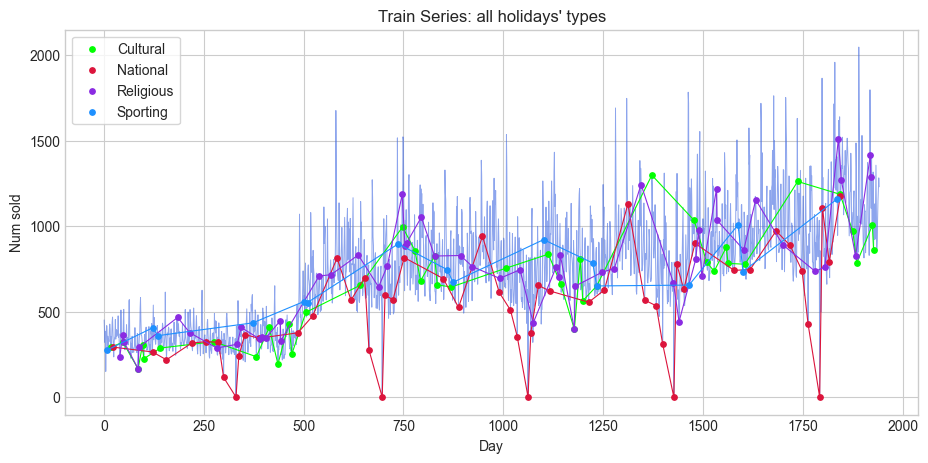

In [26]:
draw_series(train_series, title='Train Series: all holidays\' types',
            show_events=True, lineplot_cats=True)

Как я и сказал выше, очевидна сезонность в национальных праздниках. На выведенном графике также заметно, что сезонный характер несут и культурные. В меньшей степени сезонность видна и у религиозных праздников, а у спортивных -- ее нет: кажется, что по большей степени синий лайнплот повторяет тренд (особенно заметно при росте продаж с 125-го по 750-ый день).

К слову, имеет место быть корреляция между спортивными и культурными праздниками.

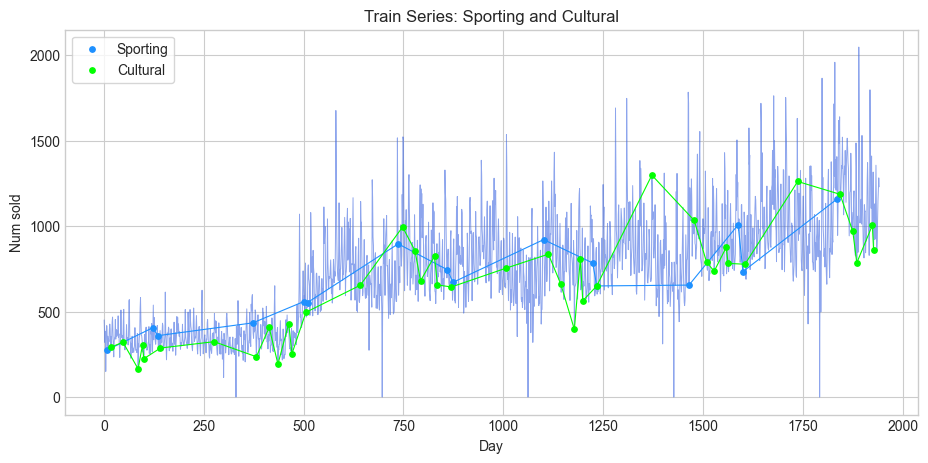

In [27]:
draw_series(train_series, title='Train Series: Sporting and Cultural',
            show_events=True, lineplot_cats=True, events=['Sporting', 'Cultural'])

В некоторые периоды тенденции явно схожи.

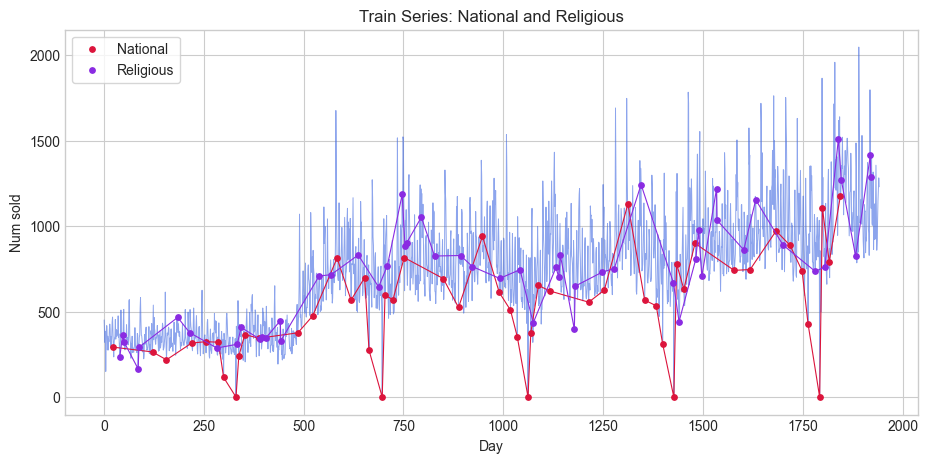

In [28]:
draw_series(train_series, title='Train Series: National and Religious',
            show_events=True, lineplot_cats=True, events=['National', 'Religious'])

Таким образом -- наиболее важные типы праздников -- национальные и религиозные. Других банально меньше, они имеют слабую сезонность, в основном повторяют тренд.

## Какие данные актуальны?

Данные собраны за пятилетний период, и по внегласному некатегорическому правилу, которое я узнал в процессе изучения темы, данных менее чем за 3 года недостаточно, а более чем за 5 лет -- избыточно. Суть его в том, что часть данных в начале часто бывает неактуальна. Здесь -- именно так, ведь тендценция меняется после 500-го дня (с станционарной на растущий тренд), до него -- данные нельзя использовать в обучении, так как будет сильное смещение прогноза.

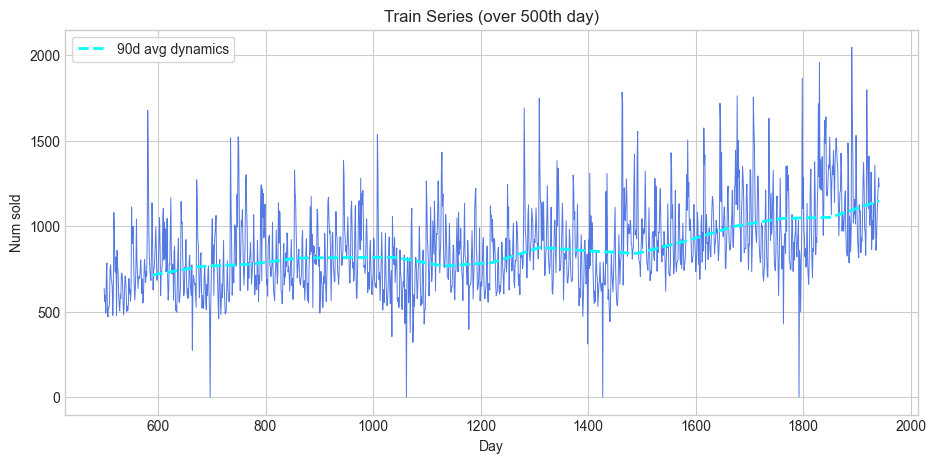

In [29]:
draw_series(train_series[train_series.index >= 500], period_N=90, title='Train Series (over 500th day)', show_events=False,)

Это показывает и распределение значений временного ряда:

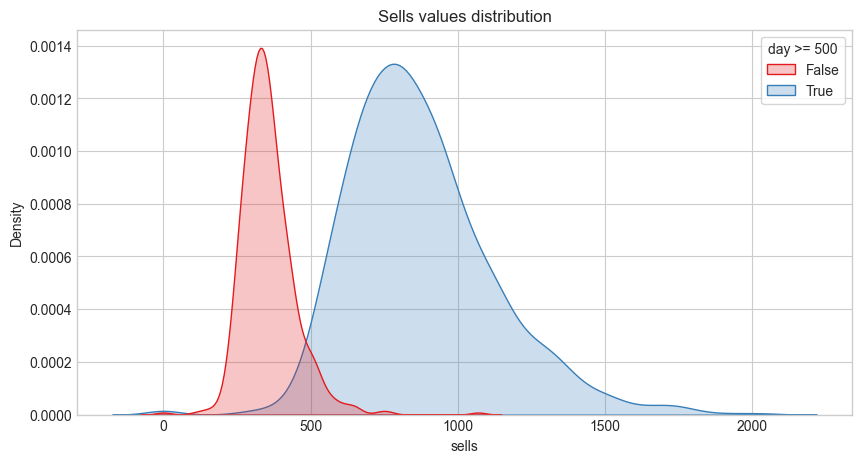

In [30]:
series_frame = train_series.to_frame('sells')
series_frame['day >= 500'] = (train_series.index >= 500)
sns.kdeplot(data=series_frame, x='sells', hue='day >= 500', 
            palette=sns.color_palette('Set1')[:2], fill=True)
plt.title('Sells values distribution')
plt.show()

Здесь становится очевидно, что эти данные уже не актуальны и никак не помогут в прогнозировании.

<!-- До 1200 дня тренда особо нет: строго динамику нельзя назвать стационарной, но по сути ряд расположен в коридоре между 500 и 1000 продаж. После 1200 дня явно виден положительный линейный тренд. -->

Про сезонность -- сказать трудно. Она определенно есть, мультипликативного характера не несет, поэтому я бы сказал, что он по большей части аддитивный.

Попробуем ограничить ряд 1200-м днем снизу чисто чтобы посмотреть.

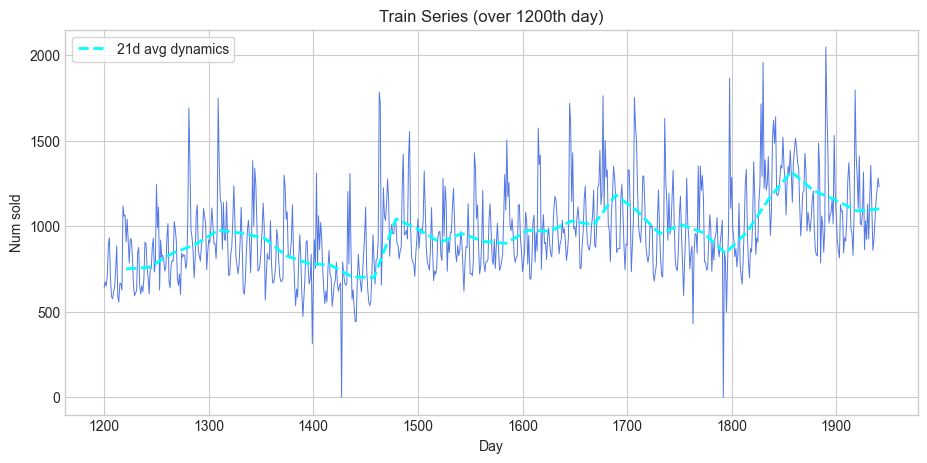

In [31]:
tmp_train = train_series[train_series.index >= 1200]
draw_series(tmp_train, title='Train Series (over 1200th day)', period_N=21)

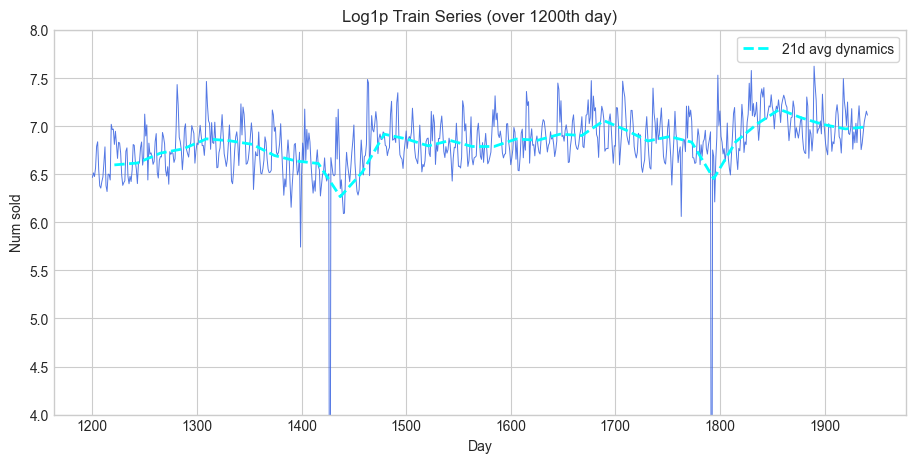

In [32]:
# Продажи в Рождество по-прежнему нули
draw_series(np.log1p(tmp_train), title='Log1p Train Series (over 1200th day)',
            period_N=21, ylim=(4.0, None))

Кажется, что ряд хорошо приближается среднем: здесь могут хорошо сработать модели ARMA, ARIMA и т.д.

Возможно, что дифференцирование ряда сделает его стационарным.

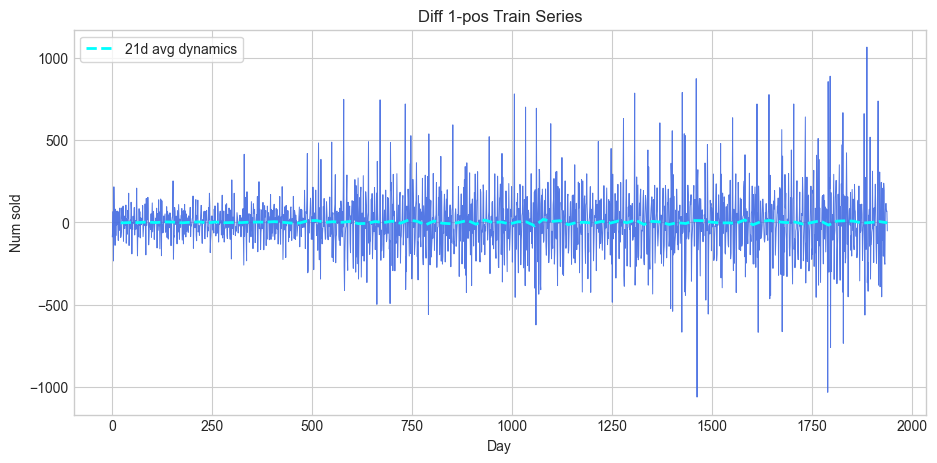

In [33]:
tmp_series_ = pd.Series(train_series.values[1:] - train_series.values[:-1])
draw_series(tmp_series_, title='Diff 1-pos Train Series', period_N=21)

В целом, да, такой ряд можно назвать стационарным. Период первых 500 дней -- особенно.

Хоть здесь уже и есть отрицательные значения, но все равно можно применить логарифмирование, чтобы уменьшить дисперсию.

In [34]:
tmp_series_.min()

-1063

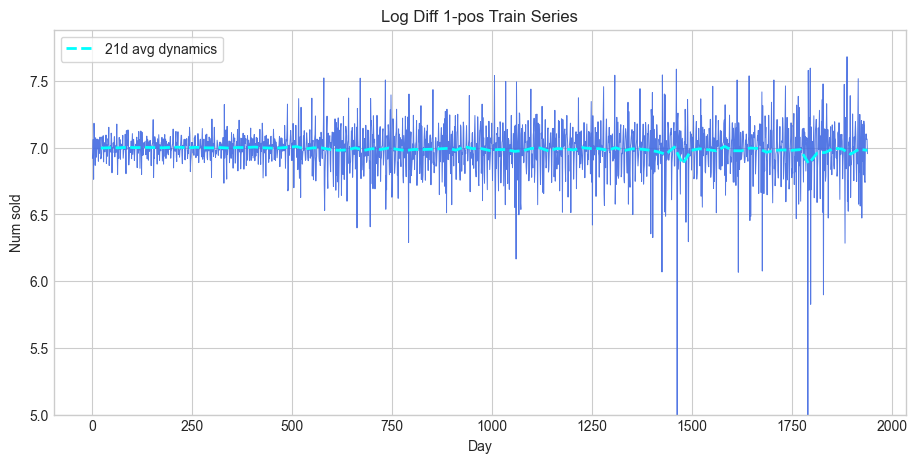

In [35]:
draw_series(np.log(tmp_series_ + 1100), title='Log Diff 1-pos Train Series',
            ylim=[5.0, None], period_N=21)

## Сезонность

Раннее я прикидывал сезонность на глазок, сейчас же хочу посмотреть поближе.

### По дням недели

Для этого возьмем какой-нибудь стационарный отрезок длиной в два-три месяца и посмотрим, как выглядит такой ряд.

Кажется, что для начала логично взять отрезок до 500-го дня.

In [36]:
tmp_df_500 = df_calendar.iloc[:500]
tmp_df_500[tmp_df_500.weekday == 'Monday'].sample(7, random_state=SEED).sort_values(by='date')

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
16,2011-02-14,11103,Monday,3,2,2011,d_17,ValentinesDay,Cultural,NaN,NaN,0,0,1
23,2011-02-21,11104,Monday,3,2,2011,d_24,PresidentsDay,National,NaN,NaN,0,0,0
44,2011-03-14,11107,Monday,3,3,2011,d_45,NaN,NaN,NaN,NaN,0,0,1
184,2011-08-01,11127,Monday,3,8,2011,d_185,Ramadan starts,Religious,NaN,NaN,1,1,0
275,2011-10-31,11140,Monday,3,10,2011,d_276,Halloween,Cultural,NaN,NaN,0,0,0
429,2012-04-02,11210,Monday,3,4,2012,d_430,NaN,NaN,NaN,NaN,1,0,1
485,2012-05-28,11218,Monday,3,5,2012,d_486,MemorialDay,National,NaN,NaN,0,0,0


Мне нравится 45-ый день. Рассмотрим период в 12 недель.

In [37]:
def draw_weeks(series: pd.Series, N_weeks, start_day_loc, figsize=(11, 5)):
    weeks_series = train_series[start_day_loc : start_day_loc + 7 * N_weeks]
    weekdays = df_calendar[start_day_loc : start_day_loc + 7 * N_weeks].weekday
    
    
    plt.figure(figsize=figsize)
    plt.plot(weeks_series, color='royalblue', linewidth=1.5)
    sns.scatterplot(x=weeks_series.index, y=weeks_series.values, hue=weekdays,
                   zorder=2)

    for _, mon in enumerate(weeks_series.index[::7]):
        plt.axvline(mon, color='crimson', linewidth=0.7, alpha=0.5)
    
    plt.legend(loc='lower left', ncol=4)
    plt.xlabel('Day')
    plt.ylabel('Num sold')
    
    date = df_calendar.loc[start_day_loc].date.replace('-', '/')
    title=f'{N_weeks} Weeks Series (from {date})'
    plt.title(title)
    plt.show()

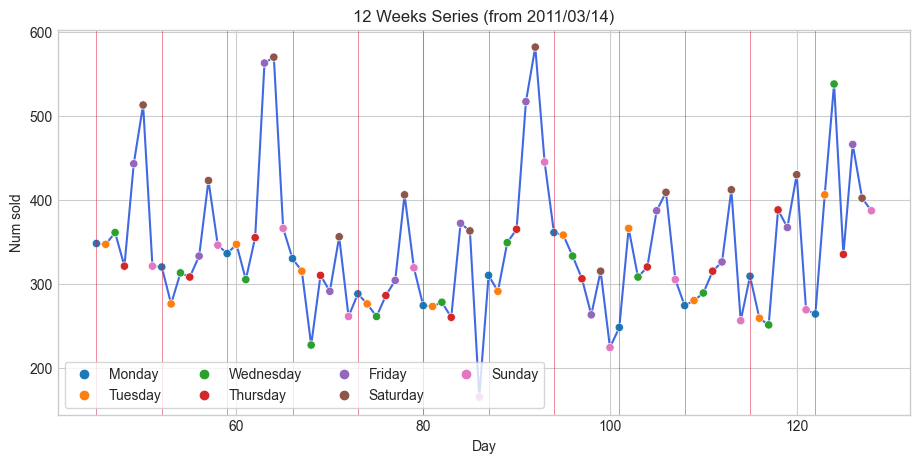

In [38]:
draw_weeks(train_series, N_weeks=12, start_day_loc=44)

С понедельника продажи растут к субботе, а нижняя точка не определена. Не сказал бы, что здесь сезонность регулярная.

Попробуем взять другой период: между 1600 и 1800 днями.

In [39]:
tmp_df_200 = df_calendar.iloc[1600:1800]
tmp_df_200[tmp_df_200.weekday == 'Monday'].sample(3, random_state=SEED).sort_values(by='date')

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1640,2015-07-27,11526,Monday,3,7,2015,d_1641,NaN,NaN,NaN,NaN,0,0,0
1654,2015-08-10,11528,Monday,3,8,2015,d_1655,NaN,NaN,NaN,NaN,1,0,0
1752,2015-11-16,11542,Monday,3,11,2015,d_1753,NaN,NaN,NaN,NaN,0,0,0


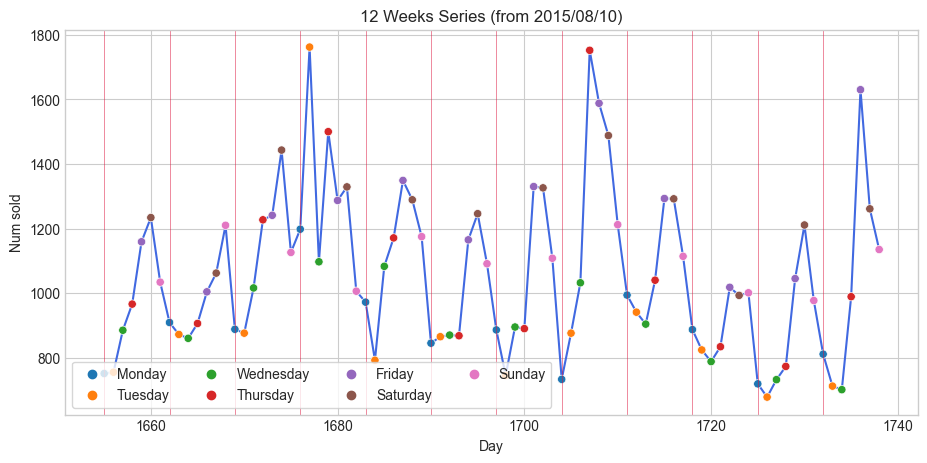

In [40]:
draw_weeks(train_series, N_weeks=12, start_day_loc=1654)

Здесь -- рост к пятнице-субботе (аналогично), низшие точки как правило вторник-среда. Тоже не назвал бы сезонность здесь регулярной.

Итак, с недельной сезонностью мы определились: рост к концу недели, спад в начале-середине; она нерегулярная, часто бывает иначе.

### По месяцам

Посмотрим теперь, какая сезонность в годичном цикле. Для этого кажется логичным аггрегировать среднем или медианой.

Возьмем период в 3 года.

In [41]:
tmp_df = df_calendar[df_calendar.year.between(2013, 2015)][['month', 'year']]
tmp_df['sells'] = train_series[tmp_df.index].values
grp = tmp_df.groupby(['month', 'year'])['sells']

In [42]:
def draw_months(grp: pd.DataFrame, aggr: str, figsize=(11, 5), title=None):
    if aggr == 'mean':
        grp_ = grp.mean().reset_index().sort_values(by=['year', 'month'], ignore_index=True)
    elif aggr == 'median':
        grp_ = grp.median().reset_index().sort_values(by=['year', 'month'], ignore_index=True)
    else:
        raise NotImplemented()
    
    
    plt.figure(figsize=figsize)
    yuniq = grp_.year.unique()
    for year, color in zip(yuniq, ['steelblue', 'dodgerblue', 'royalblue']):
        _ = grp_[grp_.year == year]
        plt.plot(_.index + 1, _.sells, color=color, linewidth=2, label=year)
    sns.scatterplot(x=grp_.index + 1, y=grp_.sells, hue=grp_.month,
                    zorder=2, palette=sns.color_palette('mako', as_cmap=True))

    plt.axvline(12.5, color='crimson', linewidth=0.7, alpha=0.5)
    plt.axvline(24.5, color='crimson', linewidth=0.7, alpha=0.5)
    
    plt.legend(ncol=4)
    plt.xlabel('Month, №')
    plt.ylabel(f'Num sold ({aggr})')
    
    plt.title(f'Sold by month for {len(yuniq)} years ({aggr})')
    plt.show()

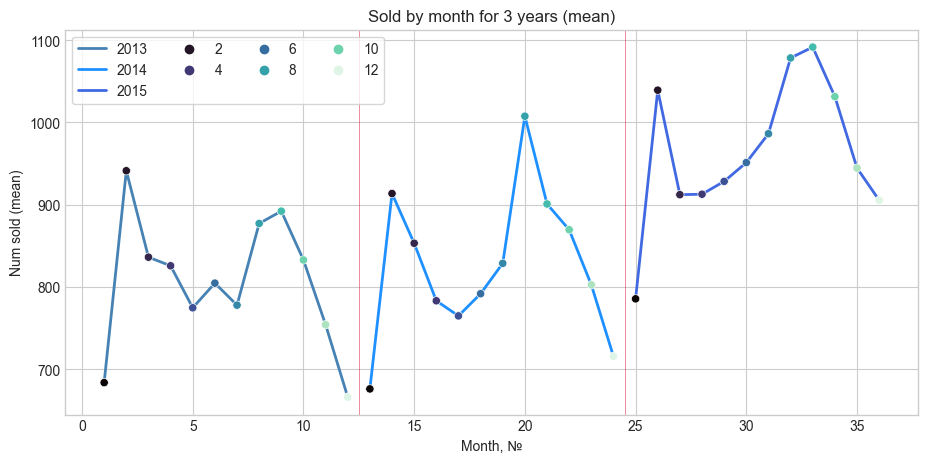

In [43]:
draw_months(grp, 'mean')

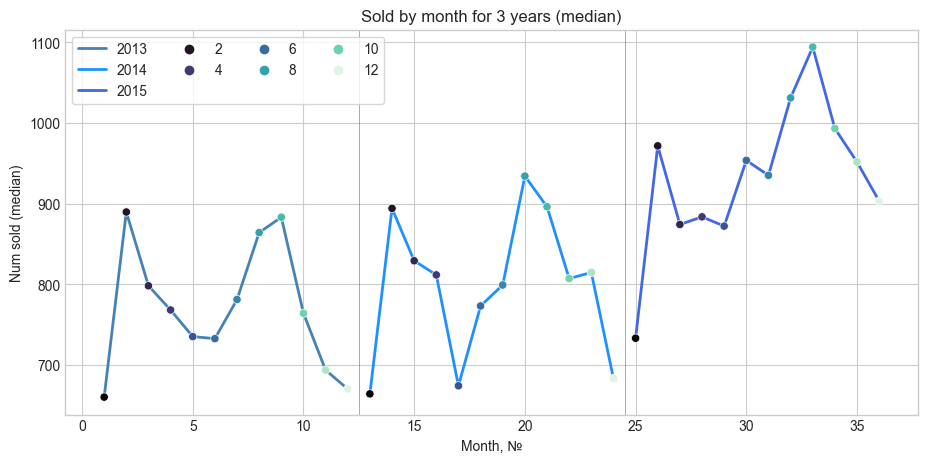

In [44]:
draw_months(grp, 'median')

Здесь все вполне себе регулярно и понятно: меньше всего продаж в январе-декабре, больше всего -- в феврале и августе-сентябре. В марте-мае наблюдается значительный спад, но не до критических значений в среднем (примечательно, что медиана числа продаж в мае в 2014 -- второй минимум). Видно, что продажи в 2015 сильно выросли и скорее всего продолжат расти в 2016. Графики среднего и медианы в целом согласованы. Можно считать сезонность здесь регулярной, так как в целом тенденции одинаковые.

# Моделирование

Для моделирования я выбрал [DeepAR](https://arxiv.org/abs/1704.04110). Данная модель вбирает в себя преимущества как базовых подходов (вероятностное прогнозирование -- линейная регрессия, ARIMA), так и рекуррентных сетей с архитектурой LSTM (авторегрессионная архитектура с "памятью"). Модель также хорошо справляется с рядами с большими колебаниями значений и с сильно искаженными их распределениями.

Кроме того, можно работать с многомерными рядами лишь с одной моделью.

Прежде чем перейти к моделированию, нужно как-то обработать данные.

## Предобработка данных

Модель DeepAR была выбрана еще и потому, что для нее требуется минимальный feature engineering для того, например, чтобы учитывать сезонность. Кроме того, для нашей задачи отлично подходит негативное биномиальное распределение (count data), что также хорошо релизовано в модели.

* Обрежем первые 500 дней в виду их неактуальности;
* Добавим метаинформацию о днях: день недели, месяц, тип праздника (его закодируем с помощью one-hot);
* Возможно, имеет смысл добавить признак года, можно считать его числовым;
* Категориальный item-specific признак для эмбеддинга товара;
* Все вручную созданные признаки стандартизируются;

Признак дня/недели года не добавляю, хотя авторы работы используют похожее для почасовых, месячных и недельных данных (нет подневных). Такие признаки они не переводят в dummy, а используют порядковое кодирование (пункт 3.4 статьи). Так и я буду делать с признаками дня недели и месяца.

Можно также добавить признак цены, за которую продавался товар в тот или иной период времени, но здесь не совсем понятно, как такой признак правильно добавить и обработать, поэтому пока так делать не буду.

Отмечу еще, что нельзя делать нормализацию значений ряда (пункт 3.3 статьи) для количественных данных: вместо этого модель использует подкапотный масштабирующий фактор.

In [45]:
ITEM_ID = df_train.item_id.values
ITEM_INDEX = df_train.index.values

In [46]:
df_train = df_train.drop(columns=['id', 'item_id', 'dept_id']).transpose()
df_valid = df_valid.drop(columns=['id', 'item_id', 'dept_id']).transpose()

In [47]:
CALENDAR = df_calendar[['d', 'date', 'event_type_1', 'event_type_2', 'wm_yr_wk']].set_index('d')
CALENDAR.date = pd.to_datetime(CALENDAR.date, infer_datetime_format=True)
CALENDAR.fillna('No_holiday', inplace=True)

Для праздников введу приоритет: если в один день выпало два праздника, то выбираем наиболее значимый тип. Так, если на один день выпали национальный и культурный факторы, то итоговый фактор праздника -- национальный, так как он более значим с точки зрения сезонности.

In [48]:
h_priory = {
    'No_holiday': 0,
    'Sporting': 1,
    'Cultural': 2,
    'Religious': 3,
    'National': 4,
}

CALENDAR.event_type_1 = CALENDAR.event_type_1.replace(h_priory)
CALENDAR.event_type_2 = CALENDAR.event_type_2.replace(h_priory)

In [49]:
def construct_features(df):
    days = df.index
    df_new = df.copy()
    
    df_new['date'] = CALENDAR.loc[days].date
    df_new['year'] = df_new.date.dt.year
    df_new['weekday'] = df_new.date.dt.weekday + 1
    df_new['month'] = df_new.date.dt.month
    
    df_new['holiday_type'] = CALENDAR[['event_type_1', 'event_type_2']].max(axis=1)
    df_new['holiday_type'] = df_new['holiday_type'].replace({v: k for k, v in h_priory.items()})
    dummies = pd.get_dummies(df_new.holiday_type) # OHE
    df_new = pd.concat((df_new, dummies), axis=1).drop('holiday_type', axis=1)
    df_new['is_Christmas'] = (df_new.date.dt.month == 12) & (df_new.date.dt.day == 25)
    df_new['is_Christmas'] = df_new['is_Christmas'].astype(int)
    return df_new

In [50]:
df_new = construct_features(df_train)
df_new.rename({'Sporting': 'is_Sporting',
               'Cultural': 'is_Cultural',
               'Religious': 'is_Religious',
               'National': 'is_National'}, axis=1, inplace=True)

И обрежем первые 500 дней.

In [51]:
df_new = df_new.iloc[500:]
df_new

,24957,24958,24959,24960,24961,24962,24963,24964,24965,24966,...,date,year,weekday,month,is_Cultural,is_National,No_holiday,is_Religious,is_Sporting,is_Christmas
d_501,0,1,0,1,2,1,0,0,0,0,...,2012-06-12,2012,2,6,0,0,0,0,1,0
d_502,0,0,0,2,1,0,0,1,0,0,...,2012-06-13,2012,3,6,0,0,1,0,0,0
d_503,0,0,0,0,1,0,0,2,0,0,...,2012-06-14,2012,4,6,0,0,1,0,0,0
d_504,1,0,0,0,1,2,0,0,0,0,...,2012-06-15,2012,5,6,0,0,1,0,0,0
d_505,0,3,0,0,3,0,0,0,0,0,...,2012-06-16,2012,6,6,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,2,0,1,0,0,0,2,1,0,1,...,2016-05-18,2016,3,5,0,0,1,0,0,0
d_1938,3,1,1,0,1,0,3,0,1,3,...,2016-05-19,2016,4,5,0,0,1,0,0,0
d_1939,0,0,2,0,1,0,3,0,0,1,...,2016-05-20,2016,5,5,0,0,1,0,0,0
d_1940,1,1,0,0,2,0,2,2,0,1,...,2016-05-21,2016,6,5,0,0,1,0,0,0


Сохраним эти данные.

In [52]:
df_new.to_csv('data/train_data.csv', index=False)

## Ценовые ряды

Дополнительно построим таблицу с рядами цен, так как цену тоже можно использовать как признак.

In [53]:
prices = df_price[df_price.store_id == store_id]
prices = prices[prices.item_id.str[:len(cat_id)] == cat_id]
prices.drop('store_id', axis=1, inplace=True)

In [54]:
assert set(prices.item_id.unique()) == set(ITEM_ID)

Переформатируем таблицу с ценами: по столбцам выведем индексы товаров, по строкам -- недели и цены.

In [55]:
id_to_index_dict = dict(zip(ITEM_ID, ITEM_INDEX))
prices_df = prices.pivot_table(values=['sell_price'], index='wm_yr_wk', columns='item_id', aggfunc='first')
prices_df.columns = prices_df.columns.get_level_values(1)
prices_df.rename(columns=id_to_index_dict, inplace=True)
prices_df = prices_df.sort_values(by='wm_yr_wk').reset_index()
prices_df

item_id,wm_yr_wk,24957,24958,24959,24960,24961,24962,24963,24964,24965,...,25994,25995,25996,25997,25998,25999,26000,26001,26002,26003
0,11101,7.32,7.32,NaN,1.98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.27,NaN,NaN,NaN,NaN
1,11102,7.32,7.32,NaN,1.98,NaN,NaN,NaN,NaN,NaN,...,7.27,NaN,NaN,NaN,3.14,4.27,NaN,NaN,NaN,NaN
2,11103,7.32,7.32,NaN,1.98,NaN,6.97,NaN,NaN,NaN,...,7.27,NaN,9.67,NaN,3.14,4.27,NaN,20.97,NaN,NaN
3,11104,7.32,7.32,NaN,1.98,NaN,6.97,NaN,NaN,NaN,...,7.27,NaN,9.67,NaN,3.14,4.27,NaN,20.97,NaN,NaN
4,11105,7.32,7.32,NaN,1.98,NaN,6.97,NaN,NaN,NaN,...,7.27,NaN,9.67,NaN,3.14,3.97,NaN,20.97,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,11617,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94
278,11618,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94
279,11619,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94
280,11620,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94


Отлично, получили цены по неделям, но хотим по дням.

In [56]:
clndr_tmp = CALENDAR[['wm_yr_wk']].reset_index().iloc[500:1941]
prices = clndr_tmp.merge(prices_df, on='wm_yr_wk', how='left', validate='m:1').set_index('d')
prices

,wm_yr_wk,24957,24958,24959,24960,24961,24962,24963,24964,24965,...,25994,25995,25996,25997,25998,25999,26000,26001,26002,26003
d,,,,,,,,,,,,,,,,,,,,,
d_501,11220,5.97,5.97,NaN,2.37,9.97,6.97,1.54,5.47,NaN,...,6.97,14.87,8.97,3.97,3.14,3.97,NaN,18.97,NaN,5.94
d_502,11220,5.97,5.97,NaN,2.37,9.97,6.97,1.54,5.47,NaN,...,6.97,14.87,8.97,3.97,3.14,3.97,NaN,18.97,NaN,5.94
d_503,11220,5.97,5.97,NaN,2.37,9.97,6.97,1.54,5.47,NaN,...,6.97,14.87,8.97,3.97,3.14,3.97,NaN,18.97,NaN,5.94
d_504,11220,5.97,5.97,NaN,2.37,9.97,6.97,1.54,5.47,NaN,...,6.97,14.87,8.97,3.97,3.14,3.97,NaN,18.97,NaN,5.94
d_505,11221,5.97,5.97,NaN,2.37,9.97,6.97,1.54,5.47,NaN,...,6.97,14.87,8.97,3.97,2.87,3.97,NaN,18.97,NaN,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,11616,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94
d_1938,11616,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94
d_1939,11616,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94


In [57]:
df_new.shape

(1441, 1057)

In [58]:
prices.isna().sum().sum() / (1441 * 1057) * 100

10.998354054822384

11% пропусков суммарно по таблице, что не очень хорошо. Вероятнее всего, что в такие дни товар просто не продавался. Возможно, эти пропуски можно заполнить среднем по каждому товару, однако я предлагаю ~выставить экстремальное значение цены, что логично: вряд ли кто-то будет покупать товар по сильно завышенной цене.~ Такой подход применять не стоит: если вдруг товар продавался, но цена завышена, то это будет уже явный выброс. Заполним медианой.

Спойлер: в итоге помогло.

In [59]:
med = prices.iloc[:, 2:].median()
med

24958     5.97
24959     8.97
24960     2.37
24961     9.97
24962     6.97
         ...  
25999     3.97
26000     2.78
26001    18.97
26002     1.97
26003     5.94
Length: 1046, dtype: float64

In [60]:
prices.iloc[:, 2:] = prices.iloc[:, 2:].fillna(med)

Теперь мы готовы работать с моделью.

In [61]:
prices.to_csv('data/price_series.csv', index=False)

Итоговые фреймы:

In [62]:
prices

,wm_yr_wk,24957,24958,24959,24960,24961,24962,24963,24964,24965,...,25994,25995,25996,25997,25998,25999,26000,26001,26002,26003
d,,,,,,,,,,,,,,,,,,,,,
d_501,11220,5.97,5.97,8.97,2.37,9.97,6.97,1.54,5.47,17.97,...,6.97,14.87,8.97,3.97,3.14,3.97,2.78,18.97,1.97,5.94
d_502,11220,5.97,5.97,8.97,2.37,9.97,6.97,1.54,5.47,17.97,...,6.97,14.87,8.97,3.97,3.14,3.97,2.78,18.97,1.97,5.94
d_503,11220,5.97,5.97,8.97,2.37,9.97,6.97,1.54,5.47,17.97,...,6.97,14.87,8.97,3.97,3.14,3.97,2.78,18.97,1.97,5.94
d_504,11220,5.97,5.97,8.97,2.37,9.97,6.97,1.54,5.47,17.97,...,6.97,14.87,8.97,3.97,3.14,3.97,2.78,18.97,1.97,5.94
d_505,11221,5.97,5.97,8.97,2.37,9.97,6.97,1.54,5.47,17.97,...,6.97,14.87,8.97,3.97,2.87,3.97,2.78,18.97,1.97,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,11616,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94
d_1938,11616,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94
d_1939,11616,5.97,5.97,8.97,2.36,9.97,6.97,1.48,5.47,17.97,...,6.97,15.94,8.97,3.93,2.74,3.97,2.78,19.54,1.97,5.94


In [63]:
df_new

,24957,24958,24959,24960,24961,24962,24963,24964,24965,24966,...,date,year,weekday,month,is_Cultural,is_National,No_holiday,is_Religious,is_Sporting,is_Christmas
d_501,0,1,0,1,2,1,0,0,0,0,...,2012-06-12,2012,2,6,0,0,0,0,1,0
d_502,0,0,0,2,1,0,0,1,0,0,...,2012-06-13,2012,3,6,0,0,1,0,0,0
d_503,0,0,0,0,1,0,0,2,0,0,...,2012-06-14,2012,4,6,0,0,1,0,0,0
d_504,1,0,0,0,1,2,0,0,0,0,...,2012-06-15,2012,5,6,0,0,1,0,0,0
d_505,0,3,0,0,3,0,0,0,0,0,...,2012-06-16,2012,6,6,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,2,0,1,0,0,0,2,1,0,1,...,2016-05-18,2016,3,5,0,0,1,0,0,0
d_1938,3,1,1,0,1,0,3,0,1,3,...,2016-05-19,2016,4,5,0,0,1,0,0,0
d_1939,0,0,2,0,1,0,3,0,0,1,...,2016-05-20,2016,5,5,0,0,1,0,0,0
d_1940,1,1,0,0,2,0,2,2,0,1,...,2016-05-21,2016,6,5,0,0,1,0,0,0
